# Final Project
## Testing Models for Sentiment Analysis 
#### Yelp Reviews of Coffee Shops (specifically Chicago Starbucks Locations) Captured From the Yelp API.

In [27]:
# Import dependencies and read our data from json file
# Remove rating level 3 as it represents neutral label
import pandas as pd
import nltk
review_data_df = pd.read_json('review-data.json')
review_data_df = review_data_df[review_data_df['rating'] != 3]
review_data_df.head()

,id,alias,coordinates,reviewCount,text,rating
1,DTsMTLeptoad_34f9DFWjQ,starbucks-reserve-chicago-3,"{'latitude': 41.91036, 'longitude': -87.677607}",108,STARBUCKS RESERVE located next to the Blue lin...,5
2,DTsMTLeptoad_34f9DFWjQ,starbucks-reserve-chicago-3,"{'latitude': 41.91036, 'longitude': -87.677607}",108,Got a coffee and told him my name. He abbrevia...,1
3,jFcEuf5B5NmsrLk0sTzpcg,starbucks-chicago-171,"{'latitude': 41.903146, 'longitude': -87.670074}",65,"So here is the scoop. \n\nSubject, customer sa...",5
4,jFcEuf5B5NmsrLk0sTzpcg,starbucks-chicago-171,"{'latitude': 41.903146, 'longitude': -87.670074}",65,I used to love coming here to get some work do...,2
5,jFcEuf5B5NmsrLk0sTzpcg,starbucks-chicago-171,"{'latitude': 41.903146, 'longitude': -87.670074}",65,"This is the busiest Starbucks, I swear!\n\nSer...",4


In [28]:
# Group data by rating and count by id
review_data_df.groupby('rating').count()[['id']]

,id
rating,
1,262
2,99
4,135
5,254


In [29]:
# Add satisfaction_level column to the dataframe
satisfaction_list = []
for rating in review_data_df['rating']:
    if rating > 3:
        satisfaction_list.append('satisfied')
    else:
        satisfaction_list.append('unsatisfied')
        
review_data_df['satisfaction_level'] = satisfaction_list

In [30]:
# Create a function to return items that do not start with ";" and the lines that are not not empty
def should_filter_line(line):
    return line.strip() and line[0] != ';'

In [31]:
# Clean up data from positive-words.txt file
positive_lines = []
with open('positive-words.txt', 'r') as pf:
    positive_lines = pf.readlines()
    positive_lines = list(filter(should_filter_line, positive_lines))

for i in range(len(positive_lines)):
    positive_lines[i] = positive_lines[i].replace('\n', '')
print(positive_lines)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [32]:
# Clean up data from negative-words.txt file
negative_lines = []
with open('negative-words.txt', 'r', encoding='utf-8', errors='ignore') as pf:
    negative_lines = pf.readlines()
    negative_lines = list(filter(should_filter_line, negative_lines))

for i in range(len(negative_lines)):
    negative_lines[i] = negative_lines[i].replace('\n', '')
print(negative_lines)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [33]:
# Positive and negative words count and use TextBlob to calculate polarity and subjectivity scores.

from textblob import TextBlob

num_positive_words_per_row = []
num_negative_words_per_row = []
polarity_values = []
subjectivity_values = []
for review_text in review_data_df['text']:
    pos_counter = 0
    neg_counter = 0
    
    for positive_word in positive_lines:
        if positive_word in review_text:
            pos_counter += 1
    num_positive_words_per_row.append(pos_counter)
    
    for negative_word in negative_lines:
        if negative_word in review_text:
            neg_counter += 1
    num_negative_words_per_row.append(neg_counter)
    
    tb = TextBlob(review_text)
    polarity_values.append(tb.sentiment.polarity)
    subjectivity_values.append(tb.sentiment.subjectivity)
  

In [34]:
# Create a new dataframe

model_df = review_data_df.copy().drop(columns=['id', 'alias', 'coordinates', 'reviewCount', 'text', 'rating'])
model_df['positive_word_count'] = num_positive_words_per_row
model_df['negative_word_count'] = num_negative_words_per_row
model_df['polarity'] = polarity_values
model_df['subjectivity'] = subjectivity_values
model_df = model_df[['positive_word_count', 'negative_word_count', 'polarity', 'subjectivity', 'satisfaction_level']]
model_df.head()

,positive_word_count,negative_word_count,polarity,subjectivity,satisfaction_level
1,2,0,0.100000,0.150000,satisfied
2,0,0,0.000000,0.000000,unsatisfied
3,2,2,0.059524,0.434524,satisfied
4,2,2,0.315000,0.800000,unsatisfied
5,0,6,0.000000,0.000000,satisfied


In [35]:
X = model_df.drop('satisfaction_level', axis=1)
y = model_df['satisfaction_level']
print(X.shape, y.shape)

(750, 4) (750,)


In [36]:
nbcldf = pd.concat([review_data_df['text'], model_df['satisfaction_level']], axis=1)
nbcldf_train = []
nbcldf_test = []
for i, row in nbcldf.iterrows():
    if (i < 400):
        train_data = (row['text'], row['satisfaction_level'])
        nbcldf_train.append(train_data)
    else:
        test_data = (row['text'], row['satisfaction_level'])
        nbcldf_test.append(test_data)
        
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(nbcldf_train)
cl.accuracy(nbcldf_test)

0.7518796992481203

## Logistic Regression
Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old".

These are categories that translate to probability of being a 0 or a 1.

Source: Logistic Regression (NU Data Science Bootcamp Class Activity)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print(f"Training Data Score: {log_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {log_classifier.score(X_test, y_test)}")

Training Data Score: 0.7455516014234875
Testing Data Score: 0.7925531914893617


In [41]:
predictions = log_classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'unsatisfied']
First 10 Actual labels: ['unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied']


## Decision Tree 
A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Source: https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac

In [42]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9928825622775801
Testing Data Score: 0.7127659574468085


In [43]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['satisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'unsatisfied']
First 10 Actual labels: ['unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied']


## Random Forest 
It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

Source: https://towardsdatascience.com/random-forest-classification-and-its-implementation-d5d840dbead0

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier = classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9928825622775801
Testing Data Score: 0.7553191489361702


In [45]:
sorted(zip(classifier.feature_importances_, model_df.columns.tolist()), reverse=True)

[(0.45532722457228514, 'polarity'),
 (0.2888867903046575, 'subjectivity'),
 (0.1322179016187052, 'positive_word_count'),
 (0.12356808350435211, 'negative_word_count')]

In [46]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['satisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'unsatisfied']
First 10 Actual labels: ['unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied']


In [47]:
y = pd.get_dummies(model_df['satisfaction_level'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## K Nearest Neighbors
It is supervised machine learning algorithm that can be used to solve both classification and regression problems. 

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Sources: 
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265

k: 1, Train/Test Score: 0.989/0.633
k: 3, Train/Test Score: 0.813/0.729
k: 5, Train/Test Score: 0.772/0.734
k: 7, Train/Test Score: 0.763/0.718
k: 9, Train/Test Score: 0.758/0.729
k: 11, Train/Test Score: 0.751/0.729
k: 13, Train/Test Score: 0.749/0.750
k: 15, Train/Test Score: 0.753/0.750
k: 17, Train/Test Score: 0.747/0.750
k: 19, Train/Test Score: 0.746/0.745


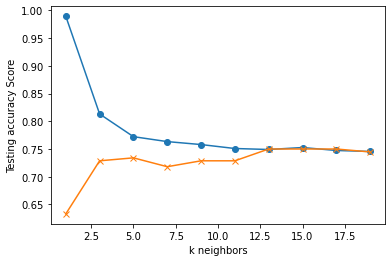

In [48]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.750


## Logistic Regression Test

In [ ]:
while True: 
    user_text = input('Enter a review: ')
    num_positive_words = 0
    num_negative_words = 0
    polarity_value = None
    subjectivity_value = None

    pos_counter = 0
    neg_counter = 0

    for positive_word in positive_lines:
        if positive_word in user_text:
            pos_counter += 1
    num_positive_words_per_row = pos_counter

    for negative_word in negative_lines:
        if negative_word in user_text:
            neg_counter += 1
    num_negative_words_per_row = neg_counter

    tb = TextBlob(user_text)
    
    polarity_value = tb.sentiment.polarity
    subjectivity_value = tb.sentiment.subjectivity

    print(log_classifier.predict([[num_positive_words_per_row, num_negative_words_per_row, polarity_value, subjectivity_value]])[0])

Enter a review:  This is a great store.


satisfied


Enter a review:  This is a horrible store.


unsatisfied
